# Problem Description
alles um tier GmBH is a pet supplies company. They are currently auditing their promotional activities and the CEO, one of the main stakeholders feels that the promotions they offer is too generic and not targetted. They have requested us to devise a customer segementation model that they can use to run targetted promotional activities

The client is interested in seeing what kind of customers are buying at alles um tier GmbH. They presume that there that there are also some smaller companies besides the private individuals who buy from alles um tier GmBH. The project scope is to build a segmentation model and analyze the resulting customer segments.

# Data

You are given a dataset at customer level for the last 2 years with the following data points. Number of transactions in the last 2 years (num_transactions), order amount (total_order_value), days between transactions (days_between_trans), re-order rate (repeat_share), average order value (aov), % of dog products bought (is_dog_user)

### Data Set
The dataset consists of 100k rows and has the following columns

CustomerID: int
UUID for the customer


num_transactions: int

number of transactions in a given year


total_order_value: int

total order value in € for the time period


days_between_trans : int

average days between transactions for a user


repeat_share: float

product share repeated every order


is_dog_user: float

percentage of products ordered that are dog food related

    
# Technical Environment
* Python
* numpy
* pandas
* scikit-learn
* matplotlib / searborn / altair / plotly

# Approach
The solution is assessed on the following skills:
* A thorough evaluation of the data set using statistical measures and visualization
* Elegant Python coding skills
* Machine Learning modelling fundamentals
* Machine Learning Training
* Model Evaluation

# Output
Please provide your solution in a jupyter notebook with clear markdown comments
The final output should be in the form of a dataframe with two columns user_id and label

### 1. Import Libraries and Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load data and get overview of first rows
df = pd.read_csv("data.csv")
print(df.shape)
df.head(5)

(100000, 8)


,Unnamed: 0,CustomerID,num_transactions,total_order_value,days_between_trans,repeat_share,is_dog_user,label
0,0,1217,399,41145.12,8,0.563256,0.699630,-1
1,1,7262,7,1454.80,41,0.255368,0.010605,2
2,2,26825,12,2137.89,18,0.397579,0.231064,4
3,3,21764,16,2582.62,20,0.439079,0.161709,4
4,4,217,6,1892.99,30,0.283809,0.380159,3


In [3]:
# Drop label column as discussed
df = df.drop('label', axis=1)

### 2. EDA

Exploratory data analysis for the customer segmentation model is performed to gain a deep understanding of the underlying patterns, relationships, and anomalies in our customer data.

In [4]:
# Check for missing values (no missing values)
print(df.isnull().sum())

Unnamed: 0            0
CustomerID            0
num_transactions      0
total_order_value     0
days_between_trans    0
repeat_share          0
is_dog_user           0
dtype: int64


In [5]:
# Drop 'Unnamed: 0' since it is only an index
df = df.drop('Unnamed: 0', axis=1)

#### 2.1 Customer ID

In the dataset provided, each CustomerID should represent a unique customer and their purchase behavior over a two-year period. However, we notice that some CustomerIDs appear multiple times, indicating possible errors in the data structuring.

To ensure accurate analysis, we will address this by taking the following actions:

1) The *num_transactions* and *total_order_value* variables will be summed across all entries for each CustomerID
2) A weighted average will be calculated for the average or ratio metrics *days_between_trans*, *repeat_share* and *is_dog_user*. The weighted average takes into account the number of transactions (*num_transactions*), with observations with more transactions receiving more weight

This reduces the dataset to 50000 customer observations.

In [6]:
# Frequencies of CustomerIDs in data set
counts = df['CustomerID'].value_counts()
counts.value_counts()

1    25000
2    11500
4     8500
3     3500
5     1500
Name: CustomerID, dtype: int64

In [7]:
# Example of CustomerID 1217 which occurs 5 times
df[df['CustomerID'] == 1217]

,CustomerID,num_transactions,total_order_value,days_between_trans,repeat_share,is_dog_user
0,1217,399,41145.12,8,0.563256,0.699630
7334,1217,9,1940.77,28,0.254063,0.213137
51395,1217,1,1062.01,51,0.131795,0.557797
57898,1217,1,1135.03,38,0.240710,0.260756
73727,1217,14,2315.37,19,0.528952,0.284400


In [8]:
def transform_data(df):
    # Aggregate count and total values
    aggregated_df = df.groupby('CustomerID').agg({'num_transactions': np.sum,
                                                  'total_order_value': np.sum})

    # Calculate weighted averages for average or ratio metrics
    for column in ['days_between_trans', 'repeat_share', 'is_dog_user']:
        df[column+'_weighted'] = df[column] * df['num_transactions']
        weighted_sums = df.groupby('CustomerID')[column+'_weighted'].sum()
        transaction_sums = df.groupby('CustomerID')['num_transactions'].sum()
        aggregated_df[column+'_weighted_avg'] = weighted_sums / transaction_sums

    return aggregated_df.reset_index()

In [9]:
# Transform data
df = transform_data(df)

In [10]:
# Frequencies of CustomerIDs in data set
counts = df['CustomerID'].value_counts()
counts.value_counts()

1    50000
Name: CustomerID, dtype: int64

In [11]:
# Example of transformed CustomerID 1217
df[df['CustomerID'] == 1217]

,CustomerID,num_transactions,total_order_value,days_between_trans_weighted_avg,repeat_share_weighted_avg,is_dog_user_weighted_avg
1217,1217,424,47598.3,8.959906,0.553782,0.674224


In [12]:
df.head(5)

,CustomerID,num_transactions,total_order_value,days_between_trans_weighted_avg,repeat_share_weighted_avg,is_dog_user_weighted_avg
0,0,438,47355.31,10.666667,0.653667,0.467431
1,1,428,48655.68,9.329439,0.493821,0.719096
2,2,425,48856.63,10.992941,0.873214,0.541297
3,3,431,48123.83,10.447796,0.492107,0.884163
4,4,431,47714.00,10.227378,0.781427,0.713894


#### 2.2 Number of Transactions

When analyzing the data on the number of transactions of Alles um Tier GmbH, noticeable patterns emerge. First, the entire data set shows an average of 31.04 transactions over a two-year period. However, this overview masks significant differences within the customer base.

When we divide the data into majority and outlier classes, we discover two distinct customer behaviors. The majority class has an average of 18.76 transactions over the two-year period.

The outlier class, on the other hand, while smaller with only 1500 customers, has a much higher average of 428.11 transactions. 

This could support the assumption that these are likely to be small businesses that purchase on a large scale. 

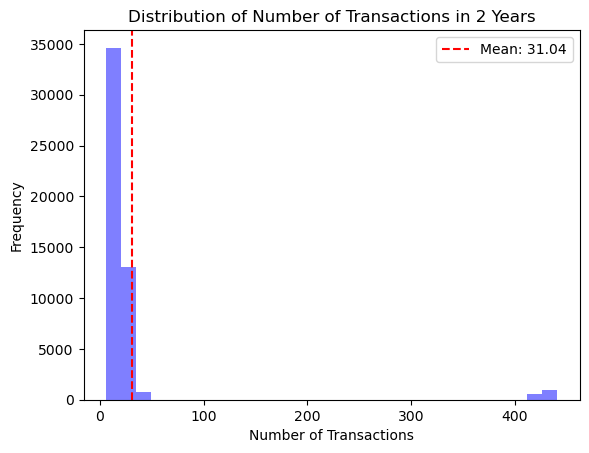

In [13]:
# Calculate the mean
mean_transactions = df['num_transactions'].mean()

# Plot
plt.hist(df['num_transactions'], bins=30, alpha=0.5, color='blue')
plt.axvline(mean_transactions, color='red', linestyle='dashed', linewidth=1.5)

plt.legend([f'Mean: {mean_transactions:.2f}'])
plt.title('Distribution of Number of Transactions in 2 Years')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

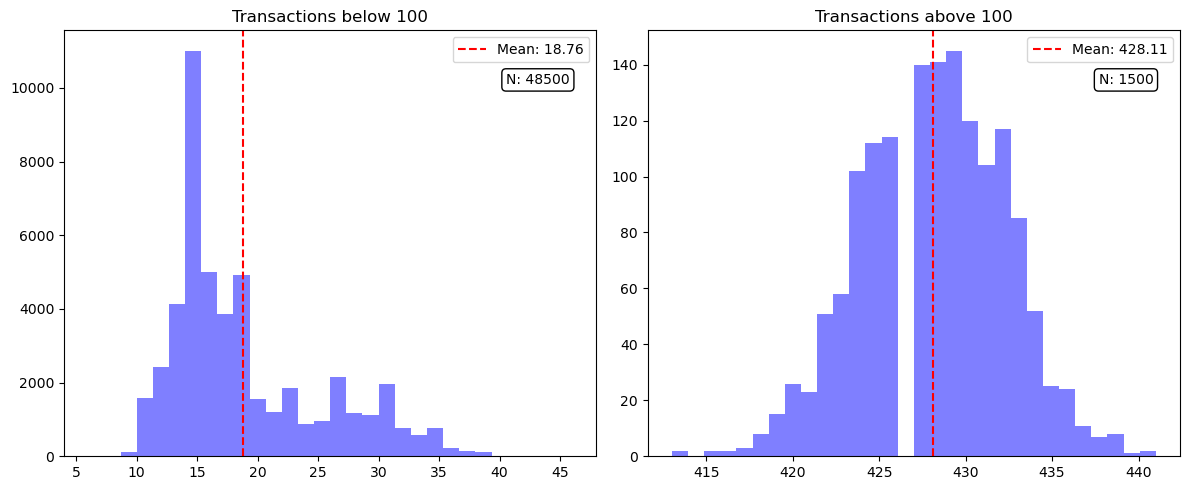

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting without outliers
outlier_below = df['num_transactions'][df['num_transactions'] < 100]
mean_transactions_below = outlier_below.mean()
axes[0].axvline(mean_transactions_below, color='red', linestyle='dashed', linewidth=1.5)
axes[0].legend([f'Mean: {mean_transactions_below:.2f}'])

axes[0].hist(outlier_below, bins=30, alpha=0.5, color='blue')
axes[0].set_title('Transactions below 100')

# Add separate legend for count of observations (n)
n_below = len(outlier_below)
axes[0].text(0.95, 0.9, f'N: {n_below}', transform=axes[0].transAxes, ha='right', va='top', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Plotting above outliers
outlier_above = df['num_transactions'][df['num_transactions'] > 100]
mean_transactions_above = outlier_above.mean()
axes[1].axvline(mean_transactions_above, color='red', linestyle='dashed', linewidth=1.5)
axes[1].legend([f'Mean: {mean_transactions_above:.2f}'])

axes[1].hist(outlier_above, bins=30, alpha=0.5, color='blue')
axes[1].set_title('Transactions above 100')

# Add separate legend for count of observations (n)
n_above = len(outlier_above)
axes[1].text(0.95, 0.9, f'N: {n_above}', transform=axes[1].transAxes, ha='right', va='top', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

#### 2.3 Total Order Value

In our examination of total order value over a two-year period for the whole dataset, the histogram revealed a mean of 5190.36€. However, a visible presence of outliers prompted us to divide the data again into majority and outlier class.

The majority class, encompassing around 48500 customers, has a mean total order value of 3865.96€. This class is characterized by three smaller, distinct distributions, reflecting varied buying behaviors. The largest segment within this class, representing numerous customers, tends to have a lower total order value, approximately around 2500€. Two smaller segments, on the other hand, show higher spending. 

The outlier class, which again consists of 1500 customers, has a significantly higher average total order value of €48012.81. 

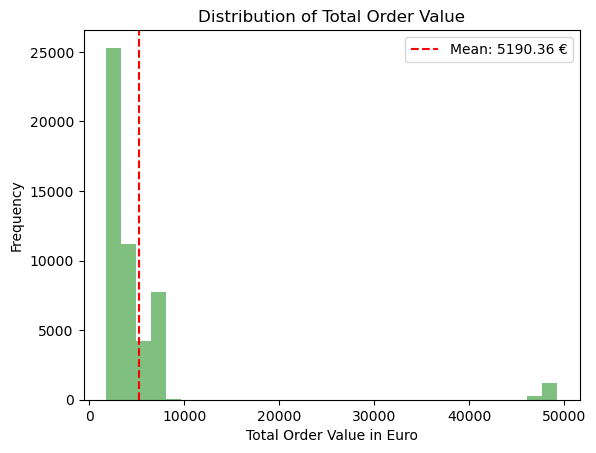

In [15]:
# Calculate the mean
mean_order = df['total_order_value'].mean()

# Plot 
plt.hist(df['total_order_value'], bins=30, alpha=0.5, color='green')
plt.axvline(mean_order, color='red', linestyle='dashed', linewidth=1.5)

plt.legend([f'Mean: {mean_order:.2f} €'])
plt.title('Distribution of Total Order Value')
plt.xlabel('Total Order Value in Euro')
plt.ylabel('Frequency')
plt.show()

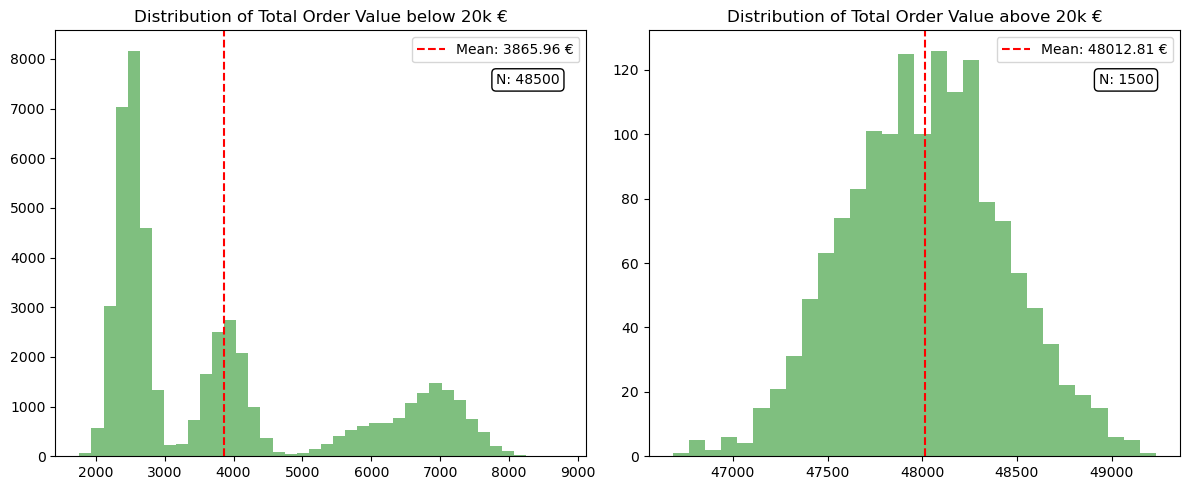

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting without outliers
outlier_below = df['total_order_value'][df['total_order_value'] < 20000]
mean_order_below = outlier_below.mean()
axes[0].axvline(mean_order_below, color='red', linestyle='dashed', linewidth=1.5)
axes[0].legend([f'Mean: {mean_order_below:.2f} €'])

axes[0].hist(outlier_below, bins=40, alpha=0.5, color='green')
axes[0].set_title('Distribution of Total Order Value below 20k €')

# Add separate legend for count of observations (n)
n_below = len(outlier_below)
axes[0].text(0.95, 0.9, f'N: {n_below}', transform=axes[0].transAxes, ha='right', va='top', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Plotting above outliers
outlier_above = df['total_order_value'][df['total_order_value'] > 20000]
mean_order_above = outlier_above.mean()
axes[1].axvline(mean_order_above, color='red', linestyle='dashed', linewidth=1.5)
axes[1].legend([f'Mean: {mean_order_above:.2f} €'])

axes[1].hist(outlier_above, bins=30, alpha=0.5, color='green')
axes[1].set_title('Distribution of Total Order Value above 20k €')

# Add separate legend for count of observations (n)
n_above = len(outlier_above)
axes[1].text(0.95, 0.9, f'N: {n_above}', transform=axes[1].transAxes, ha='right', va='top', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.tight_layout()
plt.show()

#### 2.4 Average Days Between Transaction

The average days between transactions, with a mean of 21.7 days, show interesting patterns with several peaks in the distribution.

First, we observe a small group of customers who make purchases at a very short interval of about 10 days. 

Then, a majority of customers show two distinct peaks in their shopping behavior. On average, these spikes occur at either 18 or 20 days, which corresponds to a plausible scenario where customers restock their supplies, possibly reflecting the time it takes for products to be consumed.

Interestingly, on average, day 19 and 21 have very few purchases, although these are surrounded by days where very many purchases occur. 

In addition, there is a broader range of customers who have an average buying cycle of 21 to 30 days. This wider spread could be due to different preferences possibly influenced by factors such as product variety, usage patterns or individual shopping habits.

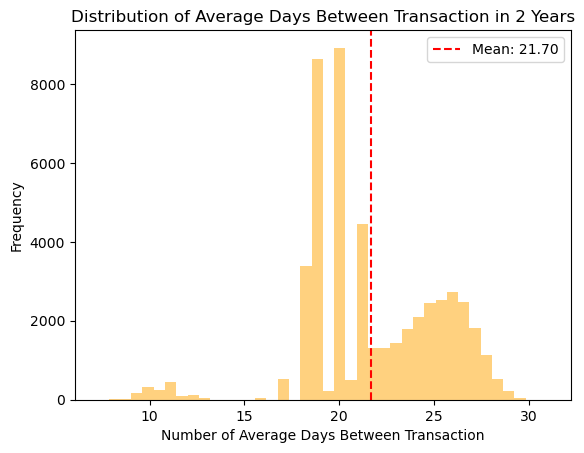

In [17]:
# Calculate the mean
mean_days = df['days_between_trans_weighted_avg'].mean()

# Plot 
plt.hist(df['days_between_trans_weighted_avg'], bins=40, alpha=0.5, color='orange')
plt.axvline(mean_days, color='red', linestyle='dashed', linewidth=1.5)

plt.legend([f'Mean: {mean_days:.2f}'])
plt.title('Distribution of Average Days Between Transaction in 2 Years')
plt.xlabel('Number of Average Days Between Transaction')
plt.ylabel('Frequency')
plt.show()

#### 2.5 Reorder Rate

An average reorder rate of 0.39 means that, on average, 39% of the items in a customer's order are items they have bought before. This indeed indicates a certain level of customer satisfaction, brand loyalty or buying habit. It could also reflect the fact that pet supplies are products that are purchased repeatedly such as food.

The range of 0.14 to 0.97 shows considerable variation among customers. Those at the lower end of the range are likely to experiment with different products or perhaps only purchase certain items repeatedly. On the other hand, customers at the high end of the range are likely to be very loyal and tend to stick with the products they know.

The small segment of customers with a high reorder rate could be, as noted earlier, small businesses that have a regular need for certain products and therefore reorder them regularly. However, it could also be individual consumers who have found products that they and their pets are satisfied with and therefore see no need to switch.

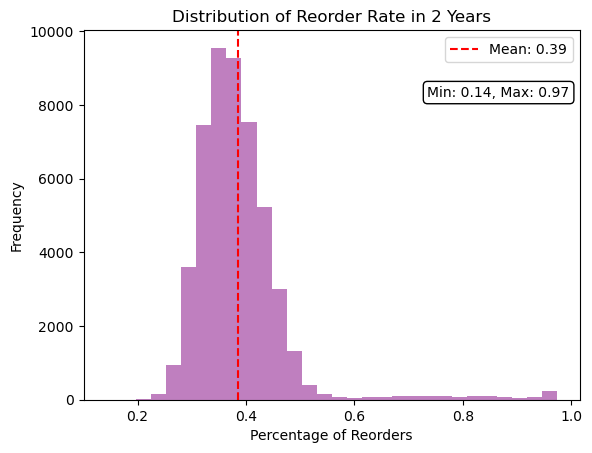

In [18]:
# Calculate the mean
mean_reorder = df['repeat_share_weighted_avg'].mean()

# Plot
plt.hist(df['repeat_share_weighted_avg'], bins=30, alpha=0.5, color='purple')
plt.axvline(mean_reorder, color='red', linestyle='dashed', linewidth=1.5)
plt.legend([f'Mean: {mean_reorder:.2f}'])

# Minimum & maximum
maximum = df['repeat_share_weighted_avg'].max()
minimum = df['repeat_share_weighted_avg'].min()

# Add text box for minimum and maximum
plt.text(0.98, 0.85, f'Min: {minimum:.2f}, Max: {maximum:.2f}', transform=plt.gca().transAxes, 
         ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

plt.title('Distribution of Reorder Rate in 2 Years')
plt.xlabel('Percentage of Reorders')
plt.ylabel('Frequency')
plt.show()

#### 2.6 Dog User

The mean dog product user rate is 0.23, signifying that on average, 23% of purchases are dog-related. Despite a sizeable group of over 1000 customers not buying any dog products, there is a contrasting peak near 1, indicating customers whose orders predominantly consist of dog supplies. 

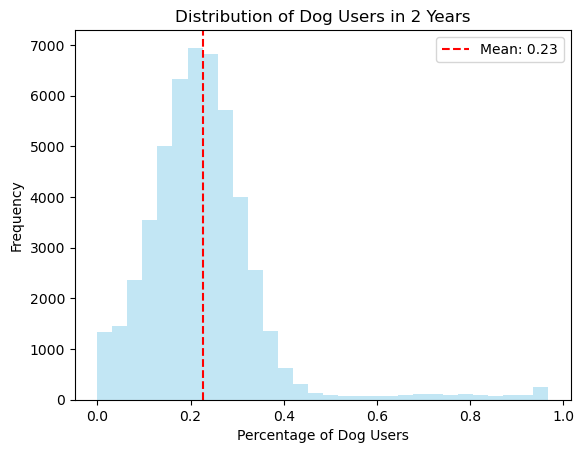

In [19]:
# Calculate the mean
mean_dog = df['is_dog_user_weighted_avg'].mean()

# Plot 
plt.hist(df['is_dog_user_weighted_avg'], bins=30, alpha=0.5, color='skyblue')

plt.axvline(mean_dog, color='red', linestyle='dashed', linewidth=1.5)
plt.legend([f'Mean: {mean_dog:.2f}'])
plt.title('Distribution of Dog Users in 2 Years')
plt.xlabel('Percentage of Dog Users')
plt.ylabel('Frequency')
plt.show()

#### 2.7 Correlation Matrix

Number of transaction and total order value have a very high positive correlation (0.988179). This means that as the number of transactions increases, the total order value usually increases and vice versa.

Average days between transactions has a strong negative correlation with Number of transaction (-0.473611), total order value (-0.361750) and reorder rate (-0.667032). This indicates that as the average number of days between transactions increases, the number of transactions, total order value, and repeat share generally decrease.

Dog users show a remarkable positive correlation with Number of transaction (0.712877) and total order value (0.716745). This indicates that customers who buy more dog products tend to have higher transaction numbers and total order values.

Reorder rate is positively correlated with Number of transaction (0.709827), total order value (0.651942), and dog users (0.480564), suggesting that higher reorder rates are associated with more transactions, higher order values, and a higher likelihood of purchasing a dog product.

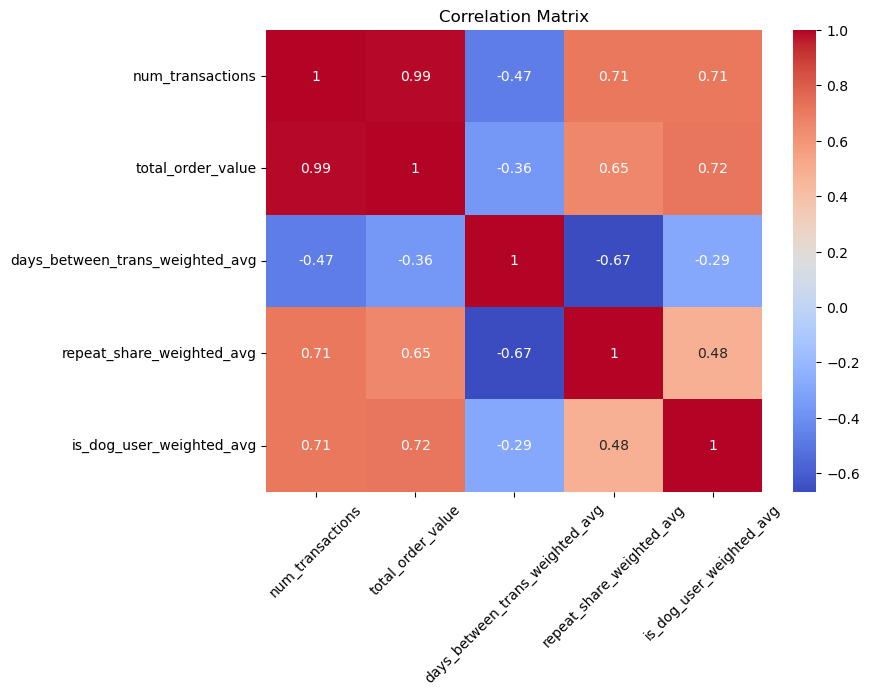

In [20]:
# Plot correlation matrix
corr_df = df.drop('CustomerID', axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation=45) 
plt.show()

### 3. Data Preprocessing for K-means

The K-Means cluster algorithm, a type of unsupervised learning model, is a typical customer segmentation method for grouping Alles um Tier GmbH customers based on their buying behavior.

Before that, the dataset needs to be scaled since this algorithm is distance-based. Therefore, features with larger numerical ranges could dominate the clustering result, leading to inaccurate or misleading results. Scaling ensures that all features contribute equally to the model. By scaling, all features have the same mean 0 and standard deviation 1.

In [21]:
# Remove CustomerID since it has no value in prediction (just kind of index)
CustomerID = df['CustomerID']
df = df.drop('CustomerID', axis=1)

In [22]:
# List column names
features = list(df.columns)

# Feature scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled.head()

,num_transactions,total_order_value,days_between_trans_weighted_avg,repeat_share_weighted_avg,is_dog_user_weighted_avg
0,5.804618,5.457527,-3.043051,3.071722,1.845328
1,5.661984,5.625837,-3.411700,1.237147,3.779978
2,5.619193,5.651847,-2.953104,5.591478,2.413165
3,5.704774,5.556998,-3.103390,1.217479,5.048919
4,5.704774,5.503953,-3.164155,4.538033,3.739993


In [23]:
df_scaled.describe()

,num_transactions,total_order_value,days_between_trans_weighted_avg,repeat_share_weighted_avg,is_dog_user_weighted_avg
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,3.410605e-17,3.524292e-17,6.639311e-16,-4.462208e-16,1.858780e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-3.571731e-01,-4.436064e-01,-3.989967e+00,-2.800729e+00,-1.748007e+00
25%,-2.430658e-01,-3.481811e-01,-7.457051e-01,-5.624471e-01,-5.620090e-01
50%,-2.002756e-01,-2.675604e-01,-1.943420e-01,-1.478342e-01,-8.220478e-02
75%,-1.146952e-01,6.014725e-02,8.659716e-01,3.301247e-01,3.896104e-01
max,5.847408e+00,5.700604e+00,2.571980e+00,6.745585e+00,5.690979e+00


### 4. Finding Optimal k

K-means clustering requires deciding the optimal number of clusters k. This decision is critical as it can significantly impact the clustering performance.

To determine k, we use the Elbow plot and the Silhouette score. The Elbow plot represents the sum of squared distances of samples to their closest cluster center for different k. The Silhouette score measures the quality of a clustering, with higher scores indicating well-defined clusters.

According to our analysis, k=3 seems to be optimal, since here the elbow is most pronounced in the elbow diagram, indicating a minimal increase in explained variance due to additional clusters. Additionally, k = 3 also corresponds to one of the highest silhouette scores, indicating well-separated clusters. This suggests that a solution with three clusters may best capture the underlying structure of the customer data.

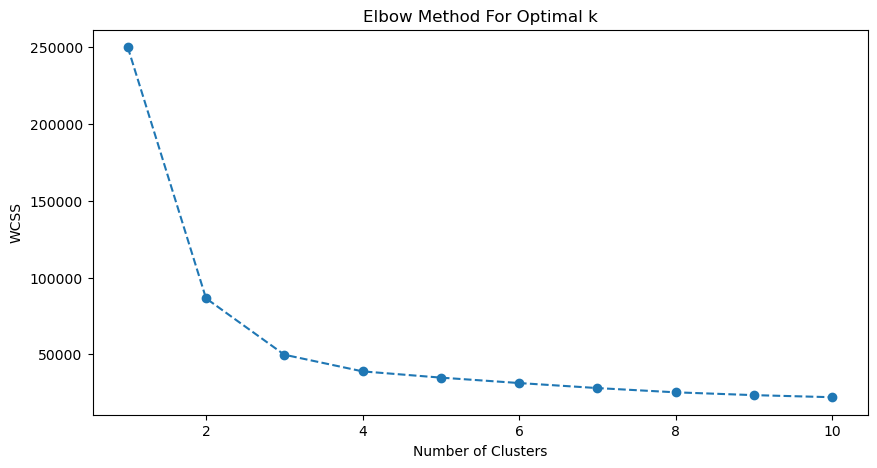

In [24]:
# Elbow method for optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled[features])
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

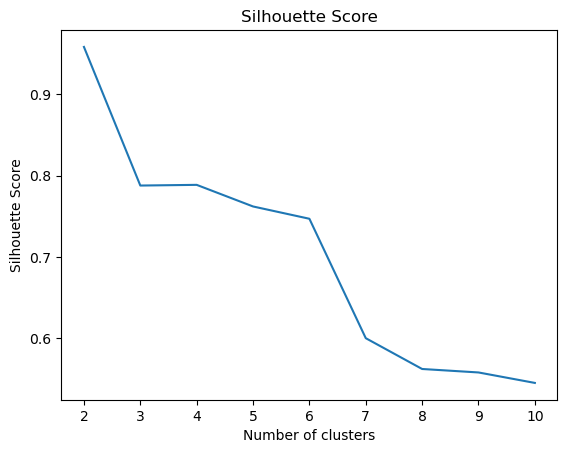

In [25]:
# Silhouette scores for each cluster
silhouette_scores = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)

# Plot
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 5. Model Building and Interpretation

To visualize our customer segments created using the k-means model, we apply Principal Component Analysis, a dimensionality reduction technique that transforms our multidimensional dataset into a 2D space where the clusters can be effectively visualized. 

After performing PCA and visualizing our k-means clustering model with k=3, we identify the following possible interpretations for the customer segments:

**New/Infrequent Private Customers (red)**: Comprising 29285 customers, this cluster forms the largest segment of Alles um Tier GmbHs customer base. The low total order value and few transactions made by these customers suggest they are either new to the company or make occasional purchases. Despite being the largest group, they contribute only 30.63% to the total revenue, suggesting untapped potential in terms of transaction frequency and total order value.

**Companies (blue)**: This is the smallest segment with 1500 customers. The high total order value and frequent purchases of this group indicate that these customers are likely small companies needing a constant supply of pet products. Despite being the smallest segment in terms of number, their contribution to the total revenue is considerable at 27.75%. This is due to their higher purchase volumes and frequent transactions, making them a significant source of revenue for the company.

**Regular Private Customers (green)**: This segment has 19215 customers, which is a significant part of the customer base. These customers, likely private individuals, don't make purchases as frequently as the companies, but their total order value suggests they consistently engage with the store. With a contribution of 41.62% to the total revenue, they are the largest revenue contributors, underlining their importance to the company's financial success.


The PCA plot highlights the significant differences in purchasing behavior between the company cluster (blue) and the other two clusters, indicating the particular purchasing behavior of company customers compared with private individuals.

The new/infrequent and regular customer clusters have a small intersection. Here, it could also be argued that these should be considered one large cluster and thus only distinguish between private and corporate customers.

However, they have noticeably different patterns, e.g., in terms of transaction volume and total order value. Therefore, despite the minor overlap, the decision was made to retain three clusters to allow for a more nuanced distinction between regular and new/infrequent customers. 

In [26]:
# K-means with k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df_scaled[features])

# Add cluster to df
df['cluster'] = kmeans.labels_

In [35]:
# Mean for each cluster
df.groupby('cluster').mean()

# 0 = New/Infrequent Private Customer Cluster
# 1 = Company Cluster
# 2 = Regular Private Customer Cluster

,num_transactions,total_order_value,days_between_trans_weighted_avg,repeat_share_weighted_avg,is_dog_user_weighted_avg
cluster,,,,,
0,14.863889,2714.312814,19.797529,0.398996,0.198897
1,428.106000,48012.810547,10.642170,0.751666,0.748695
2,24.700130,5621.139512,25.475601,0.337721,0.230109


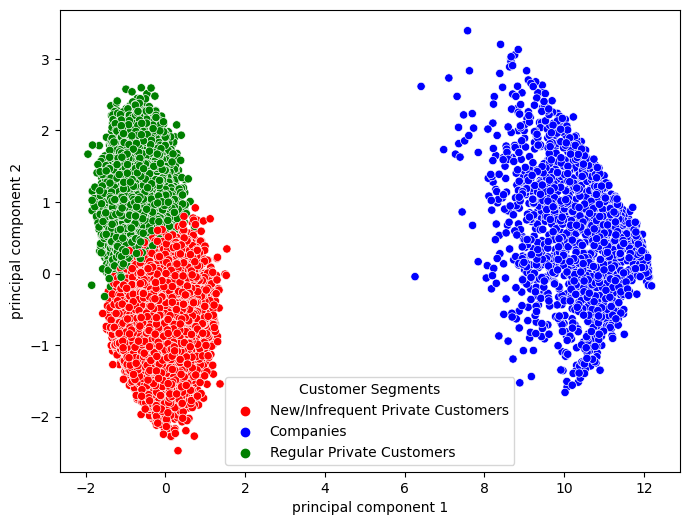

In [28]:
# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled[features])

# Convert 
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

# Concatenate the cluster labels
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)

# Custom palette and labels 
legend_labels = {0:'New/Infrequent Private Customers', 1:'Companies', 2:'Regular Private Customers'}
custom_palette = {0:'red', 1:'blue', 2:'green'}

# Plot
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", 
                     hue="cluster", data=finalDf, palette=custom_palette)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, [legend_labels[int(h.get_label())] for h in handles if h.get_label() in ['0','1','2']], 
          title='Customer Segments')

plt.show()

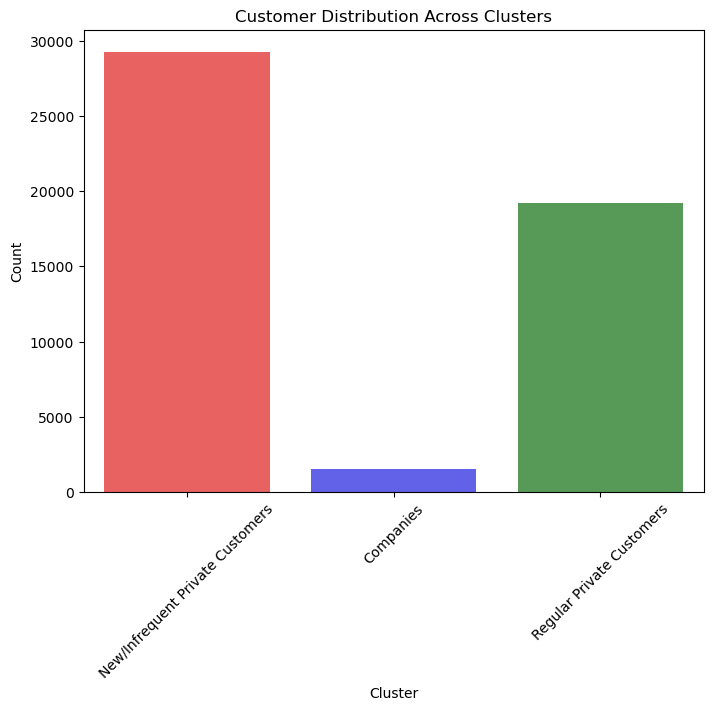

In [29]:
# Custom palette and labels
custom_palette = {0:'red', 1:'blue', 2:'green'}
legend_labels = {0:'New/Infrequent Private Customers', 1:'Companies', 2:'Regular Private Customers'}

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=df['cluster'].value_counts().index, 
            y=df['cluster'].value_counts().values, palette=custom_palette, alpha=0.7)

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Customer Distribution Across Clusters')
plt.xticks(ticks=[0,1,2], labels=[legend_labels[x] for x in range(3)], rotation=45)
plt.show()

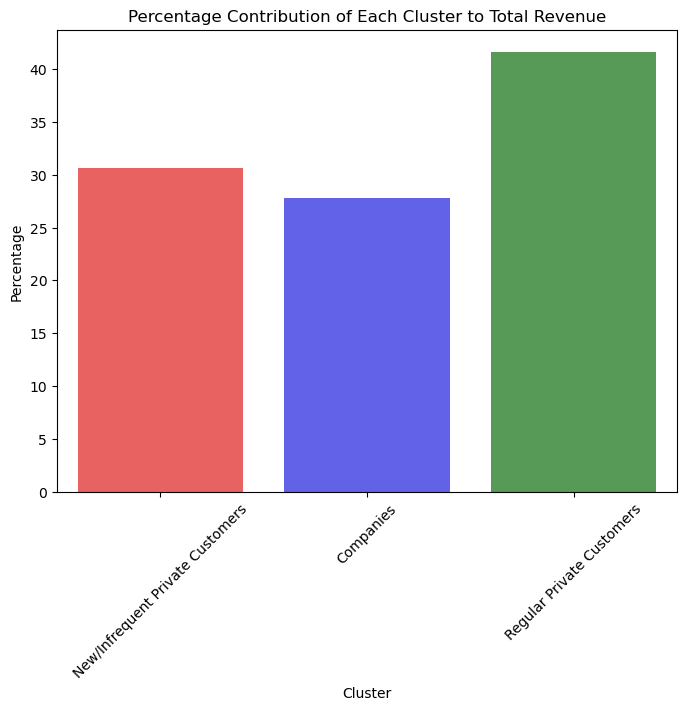

In [32]:
# Calculate total order value per cluster
total_order_value_per_cluster = df.groupby('cluster')['total_order_value'].sum()

# Calculate total order value for all clusters
total_order_value_all = df['total_order_value'].sum()

# Calculate percentage contribution of each cluster
percentage_contribution = (total_order_value_per_cluster / total_order_value_all) * 100

# Create data frame
contrib_df = pd.DataFrame(percentage_contribution).reset_index()
contrib_df.columns = ['Cluster', 'Percentage']

# Map cluster labels to names
cluster_names = {0:'New/Infrequent Private Customers', 1:'Companies', 2:'Regular Private Customers'}

# Replace the cluster numbers with names
contrib_df['Cluster'] = contrib_df['Cluster'].map(cluster_names)

# Plot 
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='Percentage', data=contrib_df, palette=['red','blue','green'], alpha = 0.7)
plt.title('Percentage Contribution of Each Cluster to Total Revenue')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

### 6. Output

In [33]:
# Create data frame only with cluster and CustomerID
final_df = pd.DataFrame(df['cluster'], CustomerID)
final_df = final_df.reset_index()

In [34]:
# Shape and overview
print(final_df.shape)
final_df.head()

(50000, 2)


,CustomerID,cluster
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
